In [ ]:
import pandas as pd
from ast import increment_lineno
from sklearn.preprocessing import LabelEncoder
import numpy  as np
import seaborn as sns
#from nltk.tokenize import word_tokenize
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression

import nltk
import re
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Diamonds = pd.read_csv('/content/Diamond .csv')

In [ ]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
Diamonds.tail(2)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
53938,Very Good,E,VS2,0.7,61.2,59.0,2757,5.69,3.49,5.72
53939,Very Good,D,SI1,0.7,62.8,60.0,2757,5.66,3.56,5.68


In [ ]:
Diamonds['color'].head(2)



,color
0,E
1,E


In [ ]:
Diamonds['col']=Diamonds['color'].str.extract('(\d+(rpm))')[0]

In [ ]:
Diamonds['col'].head(3)

,col
0,NaN
1,NaN
2,NaN


In [ ]:
Diamonds['col']=Diamonds['col'].str.replace("cut","")

In [ ]:
Diamonds['col']=pd.to_numeric(Diamonds['col'],errors="coerce")

In [ ]:
Diamonds["clarity"]=pd.to_numeric(Diamonds['clarity'],errors="coerce")

In [ ]:
Diamonds['col'] = pd.to_numeric(Diamonds['col'], errors='coerce')

In [ ]:
numcols = Diamonds.select_dtypes(include=np.number) #np.number selects both int & float
objcols=Diamonds.select_dtypes(include=['object'])

In [ ]:
Diamonds.head(4)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good),col
0,Fair,E,NaN,0.22,65.1,61.0,337,3.87,2.49,3.78,NaN
1,Fair,E,NaN,0.86,55.1,69.0,2757,6.45,3.52,6.33,NaN
2,Fair,F,NaN,0.96,66.3,62.0,2759,6.27,4.07,5.95,NaN
3,Fair,F,NaN,0.70,64.5,57.0,2762,5.57,3.58,5.53,NaN


In [ ]:
numcols.describe()

,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good),col
count,0.0,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,0.0
mean,NaN,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526,NaN
std,NaN,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135,NaN
min,NaN,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000,NaN
50%,NaN,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000,NaN
75%,NaN,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000,NaN
max,NaN,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000,NaN


In [ ]:
numcols.mean()

,0
clarity,NaN
carat,0.797940
depth,61.749405
table,57.457184
price,3932.799722
x (Premium),5.731157
z (Very Good),3.538734
y (Good),5.734526
col,NaN


In [ ]:
for col in numcols.columns:
  numcols[col]=numcols[col].fillna(numcols[col].median())

In [ ]:
numcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clarity        0 non-null      float64
 1   carat          53940 non-null  float64
 2   depth          53940 non-null  float64
 3   table          53940 non-null  float64
 4   price          53940 non-null  int64  
 5   x (Premium)    53940 non-null  float64
 6   z (Very Good)  53940 non-null  float64
 7   y (Good)       53940 non-null  float64
 8   col            0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 3.7 MB


In [ ]:
numcols.skew()

,0
clarity,NaN
carat,1.116646
depth,-0.082294
table,0.796896
price,1.618395
x (Premium),0.378676
z (Very Good),1.522423
y (Good),2.434167
col,NaN


In [ ]:
numcols.kurt()

,0
clarity,NaN
carat,1.256635
depth,5.739415
table,2.801857
price,2.177696
x (Premium),-0.618161
z (Very Good),47.086619
y (Good),91.214557
col,NaN


<Axes: ylabel='Frequency'>

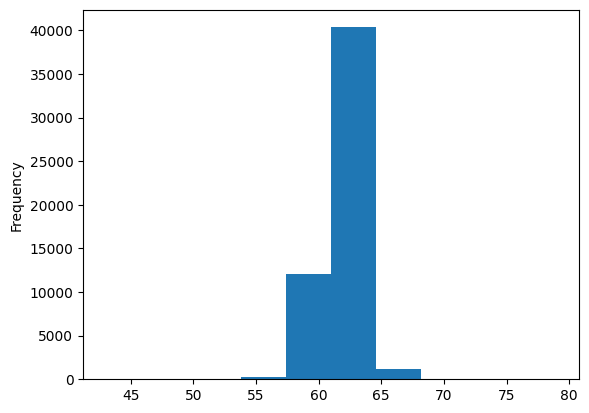

In [ ]:
numcols['depth'].plot(kind="hist")  # Code for Histogram

<Axes: >

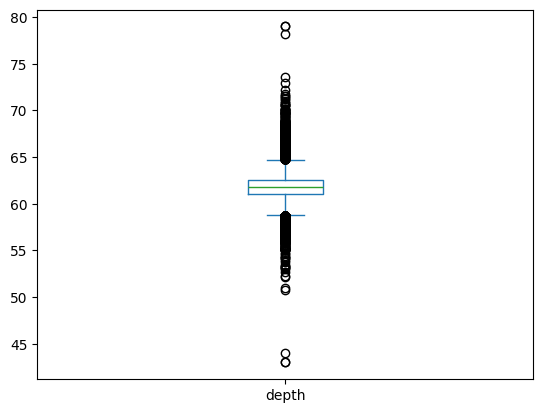

In [ ]:
numcols['depth'].plot(kind="box")    # Code for Box Plot

<Axes: >

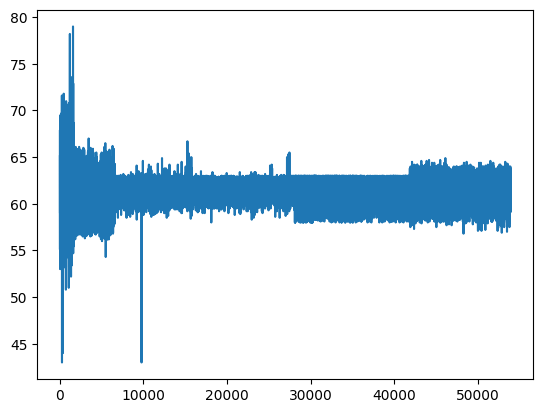

In [ ]:
numcols['depth'].plot(kind="line")

<Axes: ylabel='Density'>

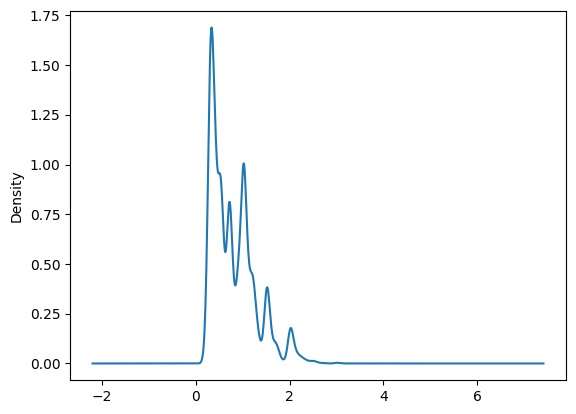

In [ ]:
numcols['carat'].plot(kind="density")

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
numcols_standard_scale=StandardScaler().fit_transform(numcols)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
numcols_standard_scale=pd.DataFrame(numcols_standard_scale,
                                    columns=numcols.columns)

In [ ]:
numcols_standard_scale.head(2)

,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good),col
0,NaN,-1.219265,2.338808,1.585529,-0.901338,-1.659155,-1.486106,-1.711308,NaN
1,NaN,0.130927,-4.641468,5.165796,-0.294731,0.640822,-0.026547,0.521374,NaN


In [ ]:
# This where The First File Ends  Car file


In [ ]:
# This where The second file Starts Wrt Churndf

In [ ]:
Diamonds['table']=pd.to_numeric(Diamonds['table'],errors="coerce")

In [ ]:
Diamonds['table']=Diamonds['table'].fillna(
    Diamonds['table'].median())

In [ ]:
numcols=Diamonds.select_dtypes(include=np.number) # np.number selects int & float
objcols=Diamonds.select_dtypes(include=['object'])

In [ ]:
objcols['price ']=numcols['price']

In [ ]:
numcols=numcols.drop('price',axis=1)

In [ ]:
objcols=objcols.drop('cut',axis=1)

In [ ]:
objcols_dummy=pd.get_dummies(objcols,columns=[''])

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

In [ ]:
Diamonds_final=pd.concat([numcols,objcols_dummy],axis=1)# Combine numcols & objcols

NameError: name 'objcols_dummy' is not defined

In [ ]:
y=Diamonds_final['Diamonds']
X=Diamonds_final.drop('Diamonds',axis=1)

NameError: name 'Diamonds_final' is not defined

In [ ]:
y=LabelEncoder().fit_transform(y)

NameError: name 'y' is not defined

In [ ]:
Diamonds = Diamonds.dropna(subset=["price"])
missing_values =Diamonds["price"].isnull().sum()
print(f"Missing Values in price: {missing_values}")

Missing Values in price: 0


In [ ]:
Diamonds["price"] = pd.to_numeric(Diamonds["price"], errors="coerce")

KeyError: ' '

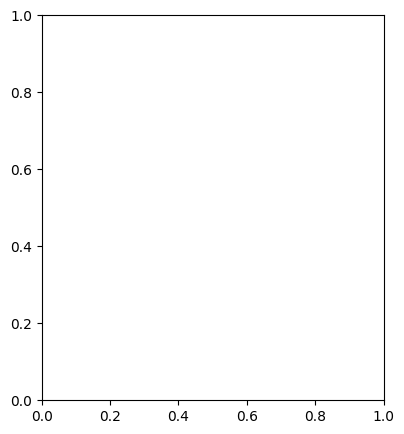

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(Diamonds[" "], bins=30, kde=True, color="blue")

plt.title("Histogram of price")
plt.xlabel("Avg price Score")
plt.ylabel("Frequency")

Text(0.5, 0, 'z (Very Good)')

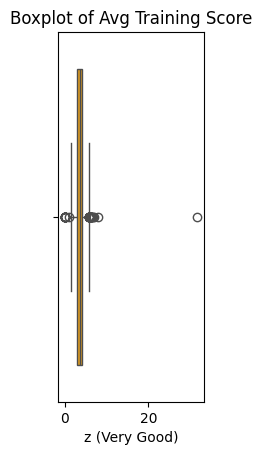

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(x=Diamonds["z (Very Good)"],color="orange")
plt.title("Boxplot of Avg Training Score")
plt.xlabel("z (Very Good)")

Text(0.5, 0, 'y (Good)')

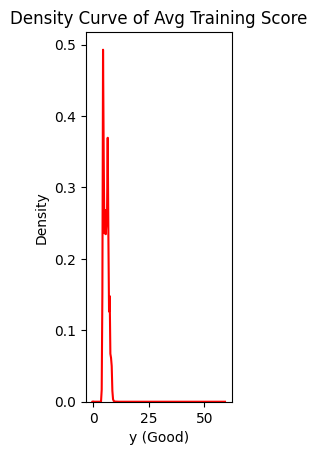

In [ ]:
plt.subplot(1, 3, 3)
sns.kdeplot(Diamonds["y (Good)"], color="red")
plt.title("Density Curve of Avg Training Score")
plt.xlabel("y (Good)")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
obj_cols = Diamonds.select_dtypes(include=["object"]).columns.tolist()
print(f"Categorical Columns: {obj_cols}")


Categorical Columns: ['cut', 'color']


In [ ]:
Diamonds_encoded = pd.get_dummies(Diamonds, columns=obj_cols, drop_first=True)
print(Diamonds_encoded.head())

   clarity  carat  depth  table  price  x (Premium)  z (Very Good)  y (Good)  \
0      NaN   0.22   65.1   61.0    337         3.87           2.49      3.78   
1      NaN   0.86   55.1   69.0   2757         6.45           3.52      6.33   
2      NaN   0.96   66.3   62.0   2759         6.27           4.07      5.95   
3      NaN   0.70   64.5   57.0   2762         5.57           3.58      5.53   
4      NaN   0.70   65.3   55.0   2762         5.63           3.66      5.58   

   col  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  \
0  NaN     False      False        False          False     True    False   
1  NaN     False      False        False          False     True    False   
2  NaN     False      False        False          False    False     True   
3  NaN     False      False        False          False    False     True   
4  NaN     False      False        False          False    False     True   

   color_G  color_H  color_I  color_J  
0    False    Fa

In [ ]:
obj_cols = Diamonds.select_dtypes(include=["object"]).columns.tolist()
Diamonds = pd.get_dummies(Diamonds, columns=obj_cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = Diamonds["is_promoted"]
X = Diamonds.drop(columns=["is_promoted"])

KeyError: 'is_promoted'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

NameError: name 'X' is not defined

In [ ]:
obj_cols = ["clarity",	"carat",	"depth","	table",	"price"	,"x (Premium)","	z (Very Good)"	,"y (Good)"	,"col"]

In [ ]:
Diamonds["carat"].fillna(Diamonds["carat"].mode()[0], inplace=True)
Diamonds["price"].fillna(Diamonds["price"].median(), inplace=True)  # Impute with median

<ipython-input-90-2b16b72b13bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Diamonds["carat"].fillna(Diamonds["carat"].mode()[0], inplace=True)
<ipython-input-90-2b16b72b13bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
Diamonds_encoded = pd.get_dummies(Diamonds, columns=obj_cols, drop_first=True)

KeyError: "['\\ttable', '\\tz (Very Good)'] not in index"

In [ ]:
print(f"Shape of encoded dataset: {Diamonds_encoded.shape}")

Shape of encoded dataset: (53940, 19)


In [ ]:
print(Diamonds_encoded.head())

   clarity  carat  depth  table  price  x (Premium)  z (Very Good)  y (Good)  \
0      NaN   0.22   65.1   61.0    337         3.87           2.49      3.78   
1      NaN   0.86   55.1   69.0   2757         6.45           3.52      6.33   
2      NaN   0.96   66.3   62.0   2759         6.27           4.07      5.95   
3      NaN   0.70   64.5   57.0   2762         5.57           3.58      5.53   
4      NaN   0.70   65.3   55.0   2762         5.63           3.66      5.58   

   col  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  \
0  NaN     False      False        False          False     True    False   
1  NaN     False      False        False          False     True    False   
2  NaN     False      False        False          False    False     True   
3  NaN     False      False        False          False    False     True   
4  NaN     False      False        False          False    False     True   

   color_G  color_H  color_I  color_J  
0    False    Fa

In [ ]:
numcols=Diamonds.select_dtypes(include=np.number) # np.number selects int & float
objcols=Diamonds.select_dtypes(include=['object'])

In [ ]:
numcols.head(2)

,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good),col
0,NaN,0.22,65.1,61.0,337,3.87,2.49,3.78,NaN
1,NaN,0.86,55.1,69.0,2757,6.45,3.52,6.33,NaN


In [ ]:
from sklearn.linear_model import LogisticRegression